In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData

In [2]:
IDR21_PATH = "/lustre/aoc/projects/hera/H1C_IDR2/IDR2_1/2458111/"
FILE_O = "zen.2458111.40141.xx.HH.uvO"
FILE_OC = "zen.2458111.40141.xx.HH.uvOC"
FILE_OCR = "zen.2458111.40141.xx.HH.uvOCR"
FILE_OCRS = "zen.2458111.40141.xx.HH.uvOCRS"
FILE_OCRSD = "zen.2458111.40141.xx.HH.uvOCRSD"
FILES = [FILE_O, FILE_OC, FILE_OCR, FILE_OCRS, FILE_OCRSD]

In [3]:
uvd_O = UVData()
uvd_OC = UVData()
uvd_OCR = UVData()
uvd_OCRS = UVData()
uvd_OCRSD = UVData()
uvds = [uvd_O, uvd_OC, uvd_OCR, uvd_OCRS, uvd_OCRSD]

In [4]:
for uvd, FILE in zip(uvds, FILES):
    uvd.read_miriad(os.path.join(IDR21_PATH, FILE))

divide by zero encountered in log10
divide by zero encountered in log10


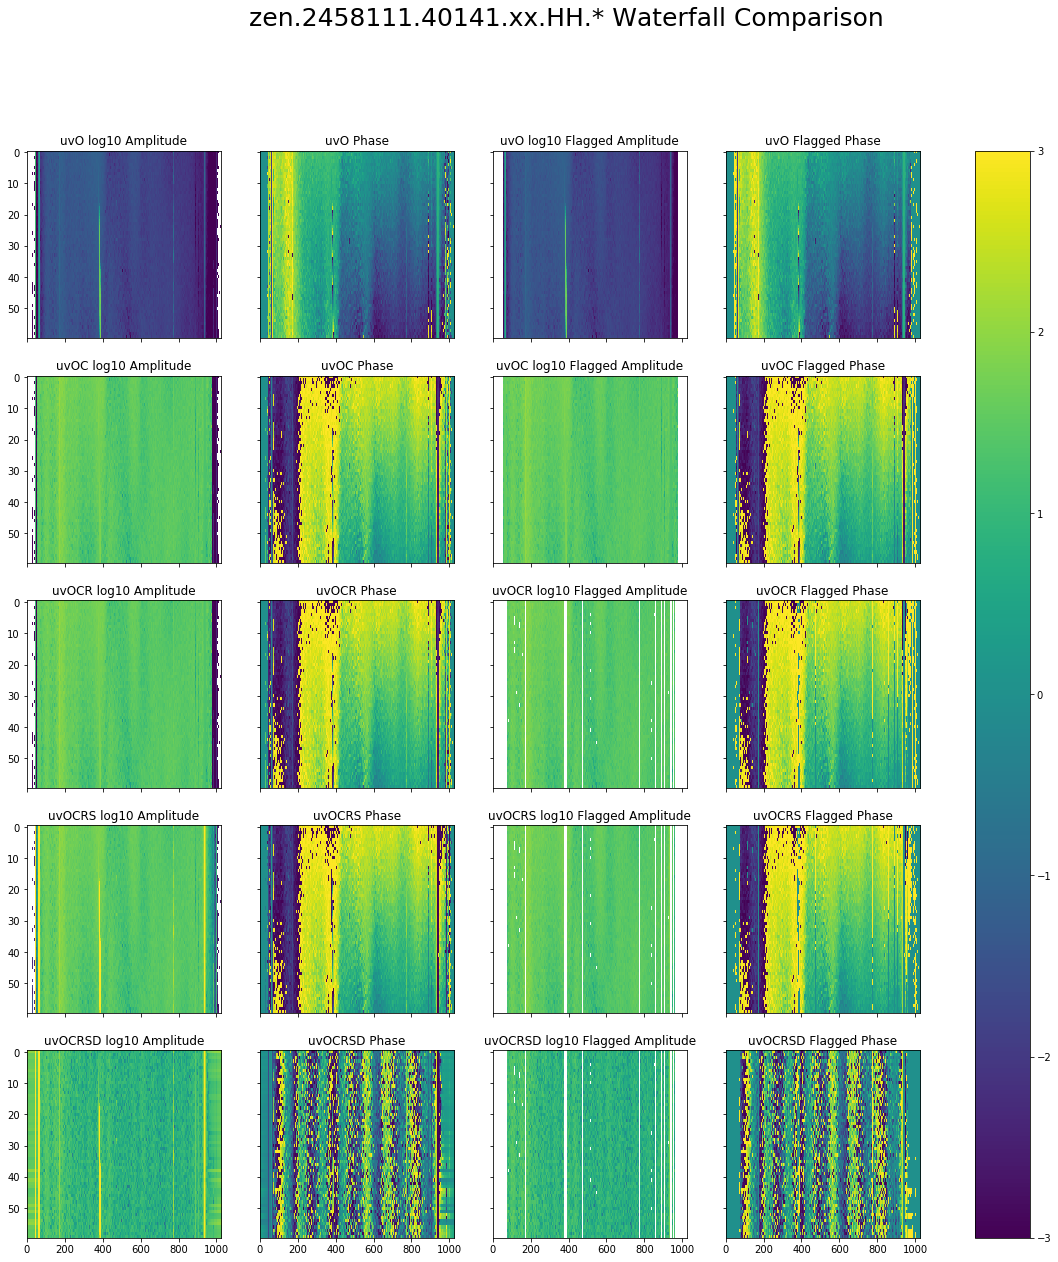

In [5]:
key = (11, 12, "xx")
fig, axes = plt.subplots(nrows=len(uvds), ncols=4, sharex=True, sharey=True, figsize=(20, 20))
fig.suptitle("zen.2458111.40141.xx.HH.* Waterfall Comparison", fontsize=25)
for i, (uvd, FILE) in enumerate(zip(uvds, FILES)):
    d = uvd.get_data(key)
    d_real = d.real
    d_imag = d.imag
    d_ampl = np.abs(d)
    d_phas = np.angle(d)

    f = uvd.get_flags(key)
    df = d * np.logical_not(f)
    df_real = df.real
    df_imag = df.imag
    df_ampl = np.abs(df)
    df_phas = np.angle(df)

    im = axes[i, 0].imshow(np.log10(d_ampl), interpolation="nearest", aspect="auto", vmax=3, vmin=-3)
    axes[i, 0].set_title("{} log10 Amplitude".format(FILE.split(".")[-1]))
    
    im = axes[i, 1].imshow(d_phas, interpolation="nearest", aspect="auto", vmax=3, vmin=-3)
    axes[i, 1].set_title("{} Phase".format(FILE.split(".")[-1]))
    
    im = axes[i, 2].imshow(np.log10(df_ampl), interpolation="nearest", aspect="auto", vmax=3, vmin=-3)
    axes[i, 2].set_title("{} log10 Flagged Amplitude".format(FILE.split(".")[-1]))
    
    im = axes[i, 3].imshow(df_phas, interpolation="nearest", aspect="auto", vmax=3, vmin=-3)
    axes[i, 3].set_title("{} Flagged Phase".format(FILE.split(".")[-1]))

# fig.subplots_adjust(wspace=0, hspace=0)
fig.colorbar(im, ax=axes.ravel().tolist())
plt.savefig("file_comparison.pdf")
plt.savefig("file_comparison.png")
plt.show()